In [13]:
import pandas as pd
import numpy as np
import wfdb
import ast


In [14]:
import pandas as pd
# Define the data from the table

data = {

    "x": [1, 2, 3, 4, 5, 6, 7],

    "p(x)": [0.02, 0.03, 0.09, 0.25, 0.40, 0.16, 0.05]

}



# Create a DataFrame for calculations

df = pd.DataFrame(data)

(df["x"]**2 * df["p(x)"]).sum()

(23.16-4.66**2)**0.5

1.2018319350058884

In [16]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

path = ''
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path+'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass


FileNotFoundError: [Errno 2] No such file or directory: '/Users/grealish/Documents/GitHub/ekg/records100/00000/00001_lr.hea'

In [ ]:
y_train

ecg_id
1        [NORM]
2        [NORM]
3        [NORM]
4        [NORM]
5        [NORM]
          ...  
21833    [STTC]
21834    [NORM]
21835    [STTC]
21836    [NORM]
21837    [NORM]
Name: diagnostic_superclass, Length: 19601, dtype: object

In [ ]:
X_train.shape

(19601, 1000, 12)

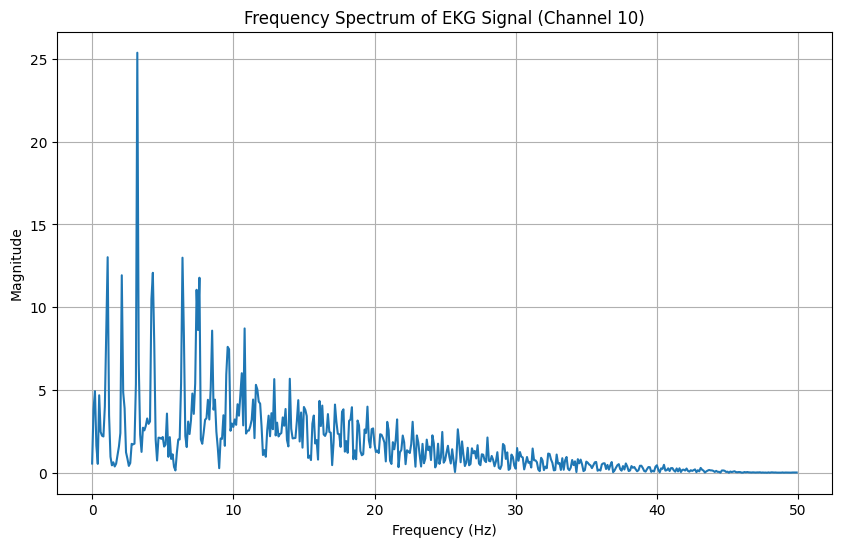

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (X_train with dimensions: sample number, 1000, 12)
# Assume X_train is already loaded
channel_idx = 10  # Choose the channel to analyze
sample_idx = 0   # Choose the sample to analyze

# Extract one sample from the chosen channel
ekg_signal = X_train[sample_idx, :, channel_idx]

# Apply FFT
N = len(ekg_signal)
fs = 100  # Sampling frequency
fft_result = np.fft.fft(ekg_signal)
frequencies = np.fft.fftfreq(N, d=1/fs)[:N//2]
magnitude = np.abs(fft_result[:N//2])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitude)
plt.title("Frequency Spectrum of EKG Signal (Channel {})".format(channel_idx))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [ ]:
frequencies

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [ ]:
fft_result

array([-5.57000000e-01+0.00000000e+00j,  3.60191709e+00-1.35190100e+00j,
       -4.43361853e+00+2.15376542e+00j,  6.91472383e-01-1.48201205e+00j,
       -5.20711818e-01-1.28888353e-01j,  4.09607380e+00-2.26401311e+00j,
        2.43862547e+00-3.93025816e-01j,  1.39308189e+00-1.75072910e+00j,
        1.60937726e+00-1.48744866e+00j,  3.77094581e+00-1.30300599e+00j,
        8.37017968e+00-1.59281774e+00j, -1.23252435e+01+4.19619752e+00j,
       -3.03908072e+00+1.66059672e+00j, -9.66582947e-01+2.51241007e-02j,
       -1.01765333e-01+4.36327901e-01j, -2.67922621e-01+5.71494424e-01j,
       -8.81142715e-02+3.68758528e-01j,  5.12693710e-01-1.93342834e-01j,
        9.87462485e-01-4.36328986e-01j,  1.38788120e+00-7.84244119e-01j,
        2.34275098e+00-5.17925614e-01j,  1.18957762e+01+8.90277865e-01j,
       -4.68382101e+00-1.28202498e+00j, -3.77052715e+00+9.53347279e-01j,
       -1.22689755e+00-1.36657930e-01j, -7.91961870e-01-3.09162016e-01j,
       -3.01292238e-01+2.82811237e-01j,  2.01306726

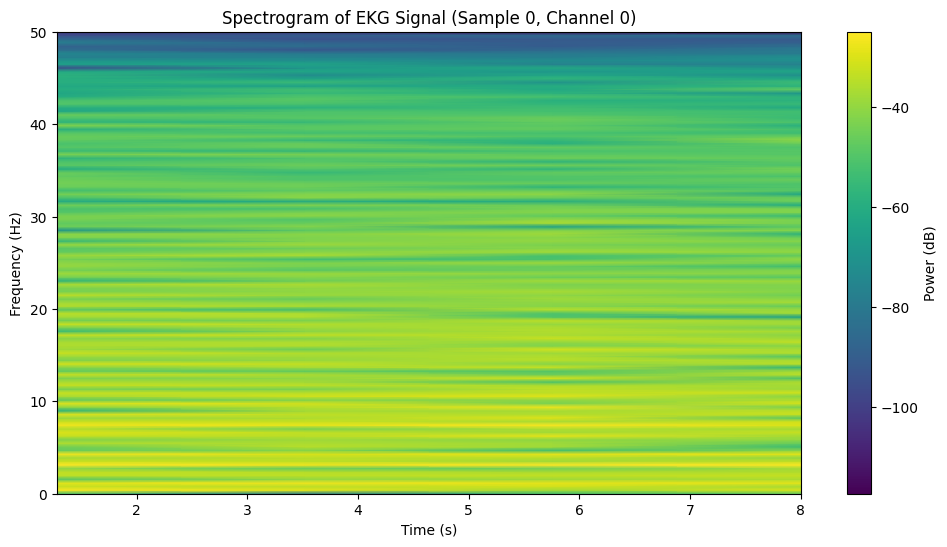

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Example data (X_train with dimensions: sample number, 1000, 12)
# Assume X_train is already loaded
channel_idx = 0  # Choose the channel to analyze

# Extract all samples for the chosen channel
channel_data = X_train[:, :, channel_idx]

# Spectrogram (using the first sample for simplicity)
sample_idx = 0
ekg_signal = channel_data[sample_idx, :]
fs = 100  # Sampling frequency
f, t, Sxx = spectrogram(ekg_signal, fs)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Spectrogram of EKG Signal (Sample {}, Channel {})".format(sample_idx, channel_idx))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(label='Power (dB)')
plt.show()

In [ ]:
channel_data.shape

(19601, 1000)

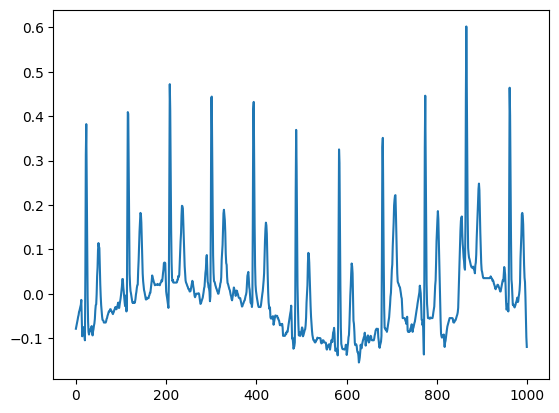

In [ ]:
plt.plot(X_train[0, :, 11])

# Loading Images

In [ ]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt

img = cv.imread(cv.samples.findFile("test/00001_lr-0.png"))

type(img)

numpy.ndarray

In [ ]:
img.shape

(1700, 2200, 3)

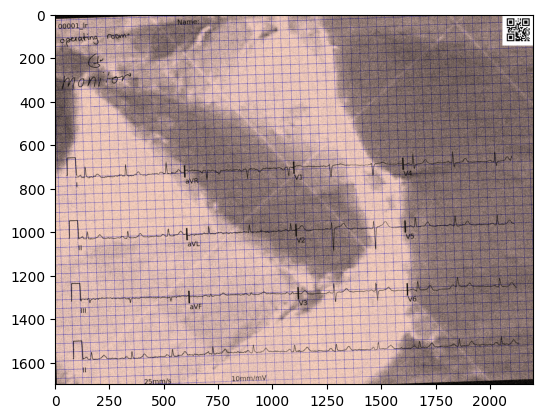

In [ ]:
plt.imshow(img)
plt.show()

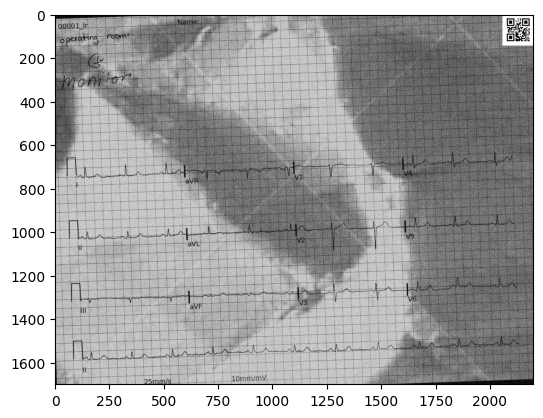

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

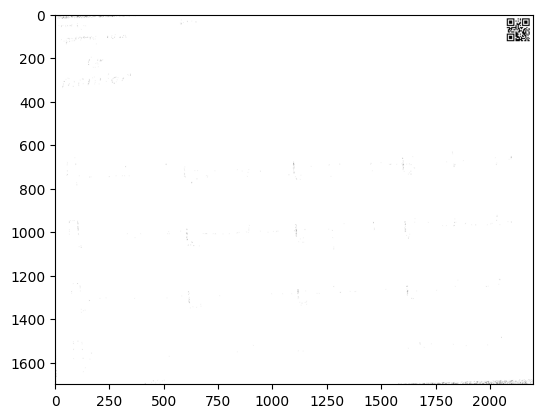

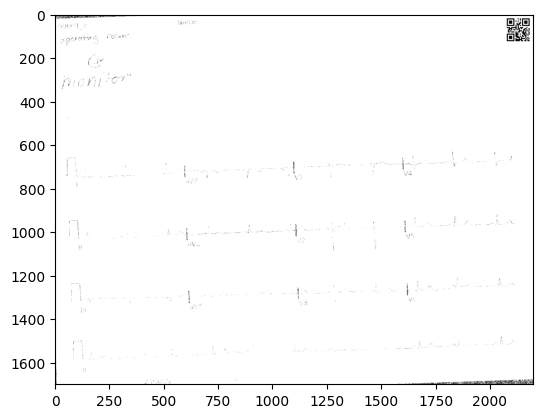

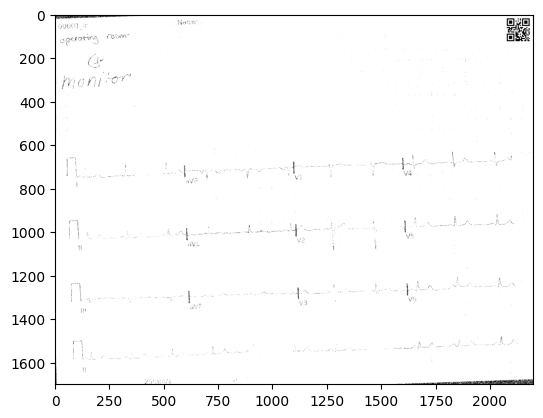

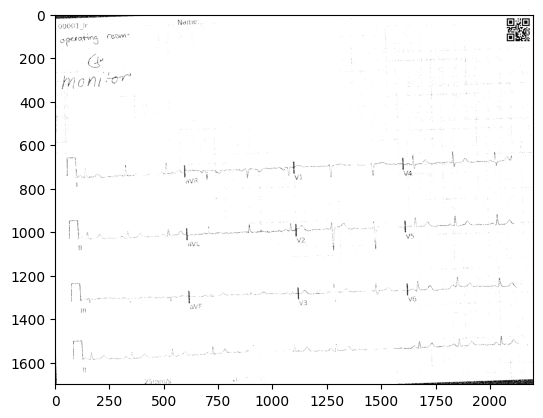

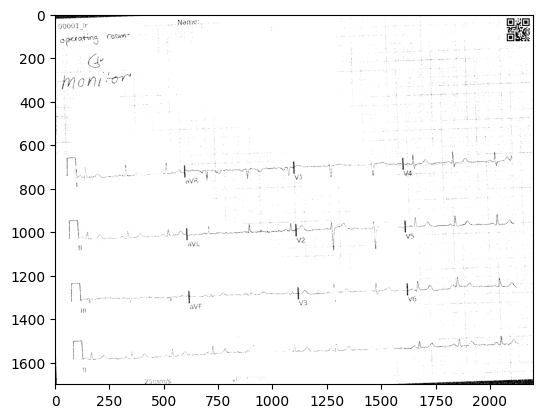

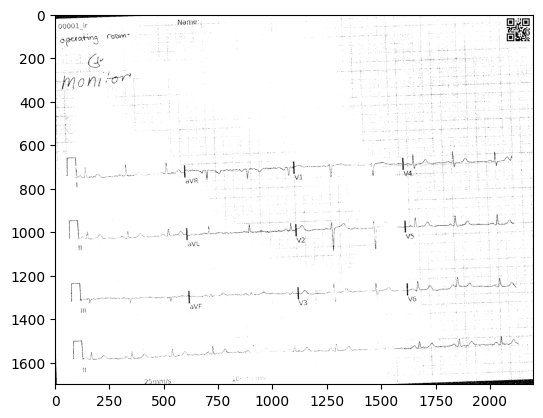

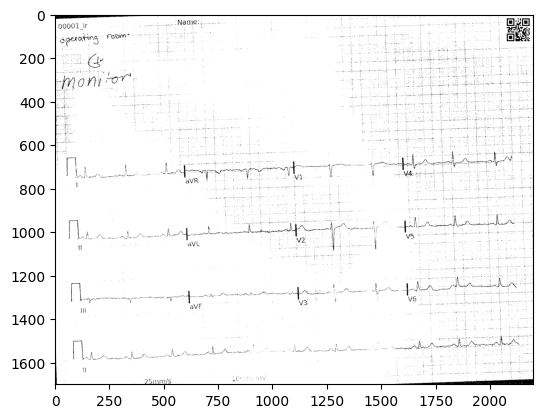

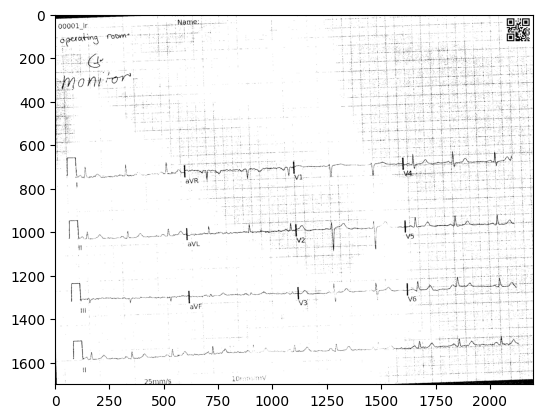

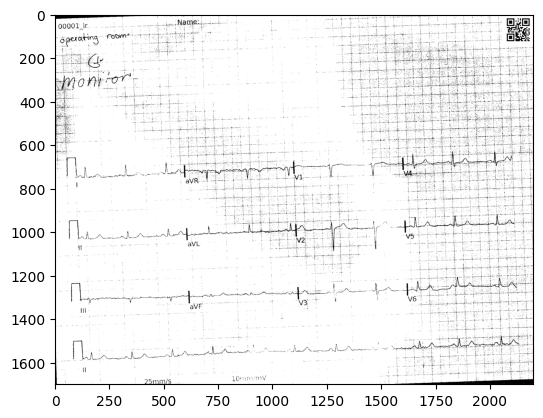

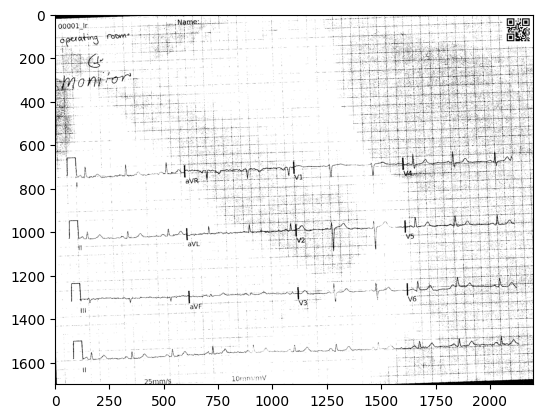

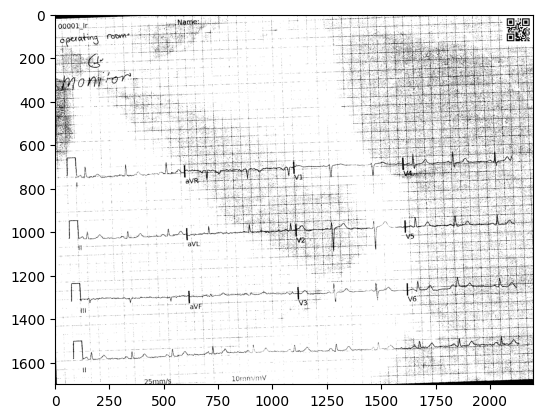

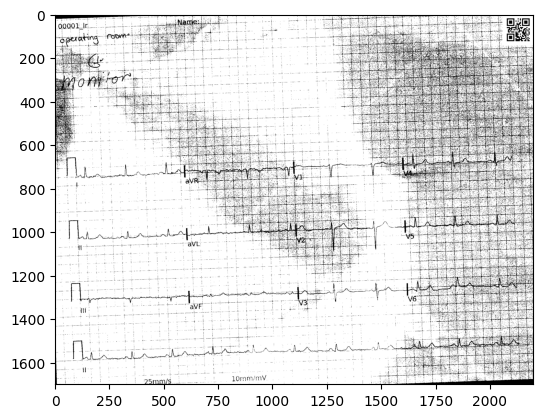

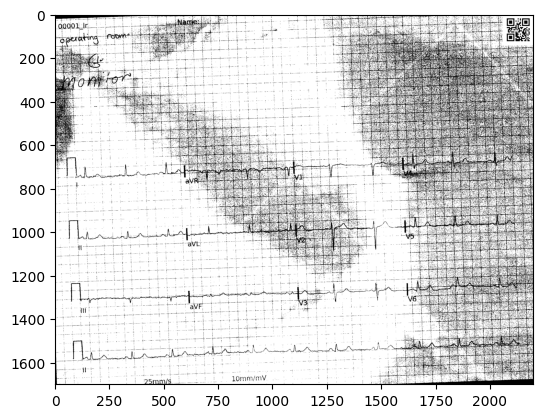

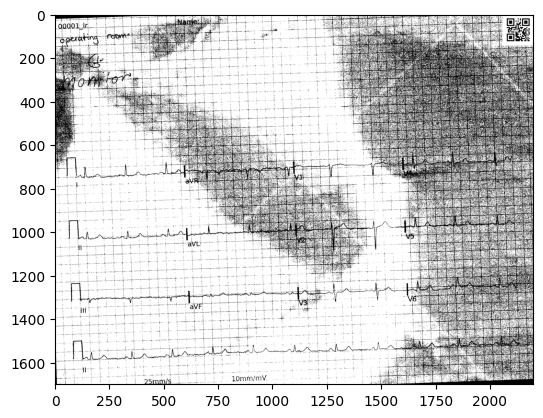

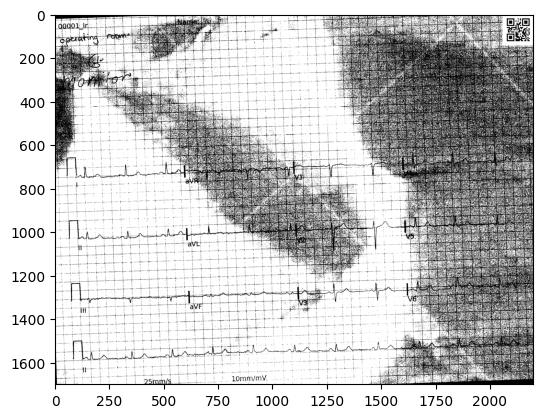

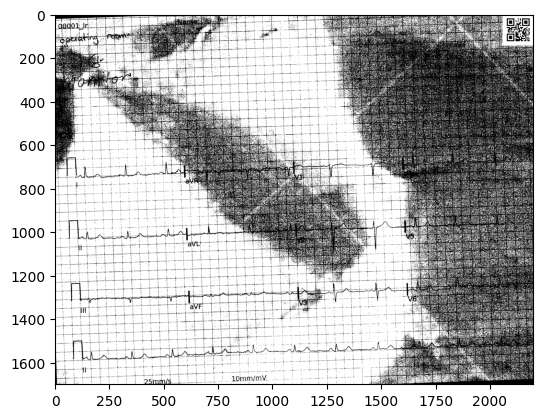

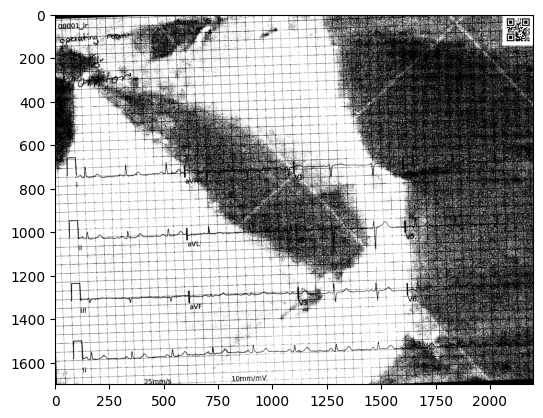

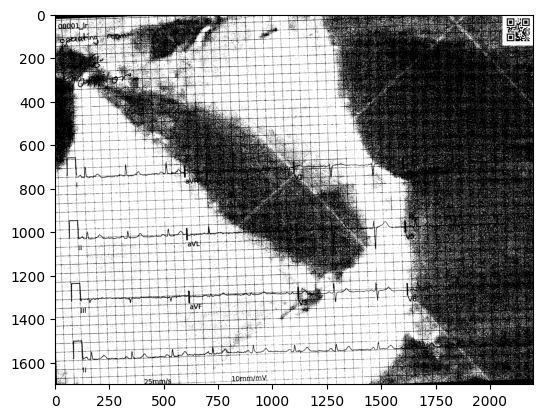

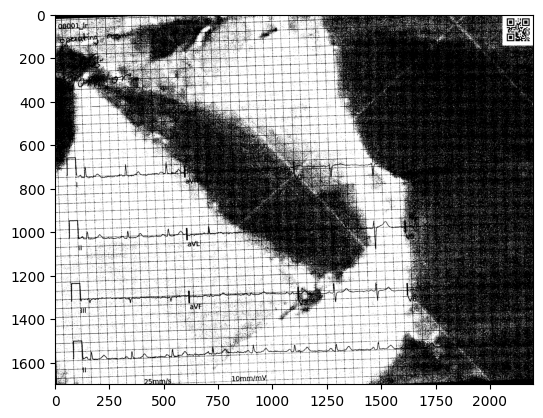

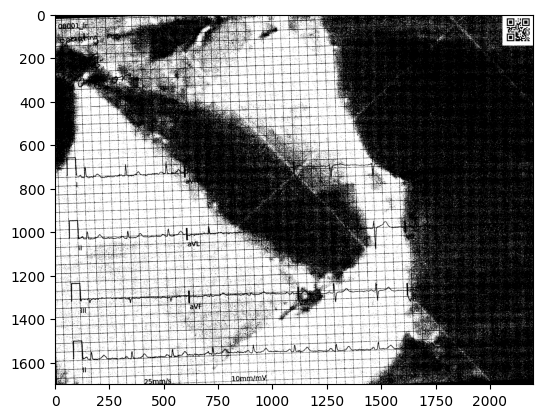

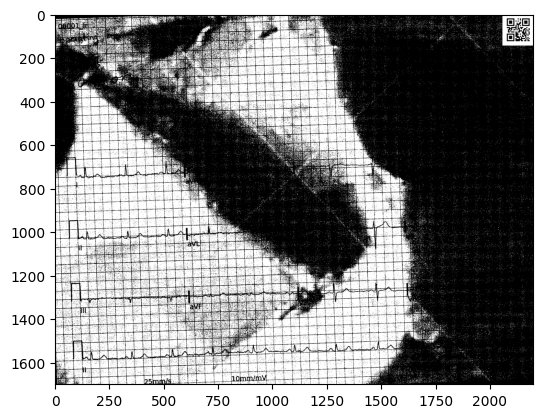

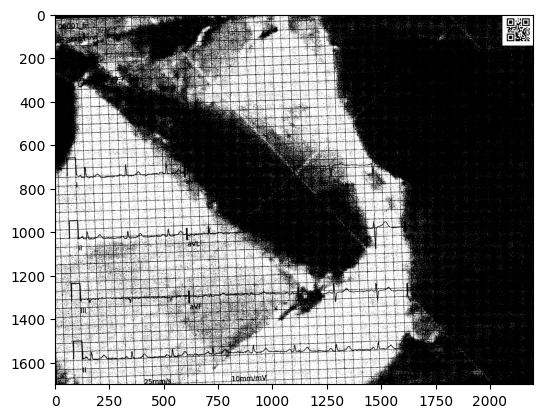

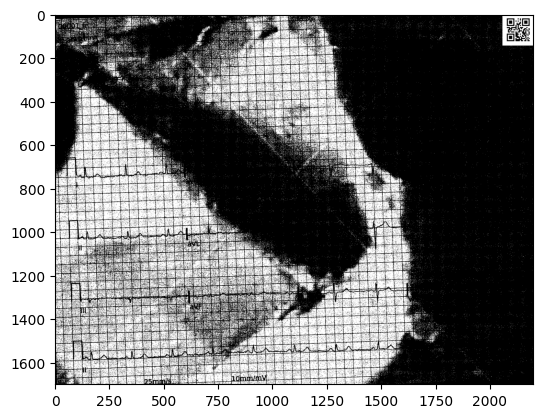

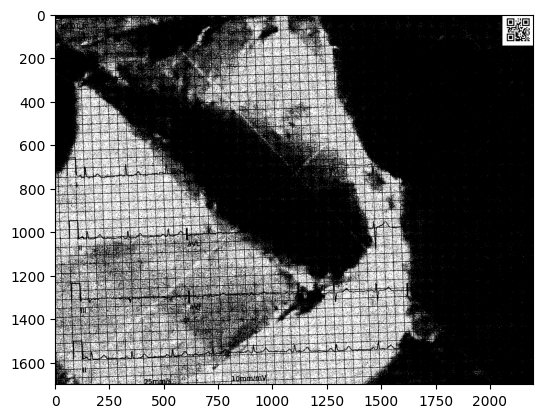

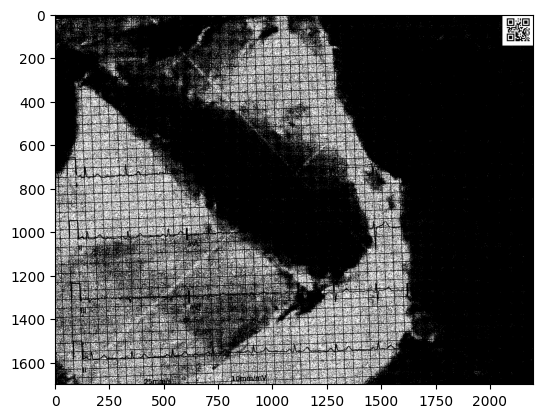

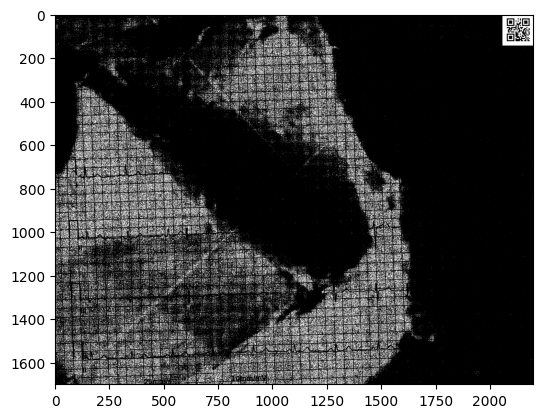

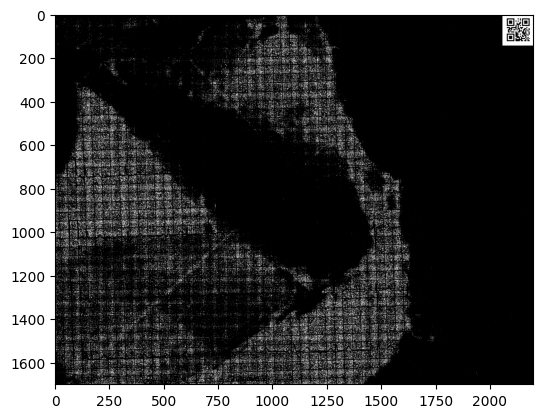

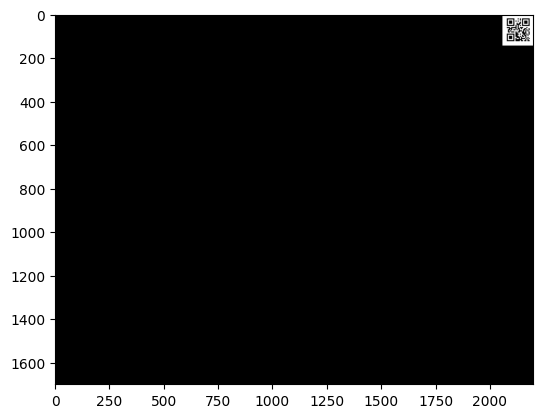

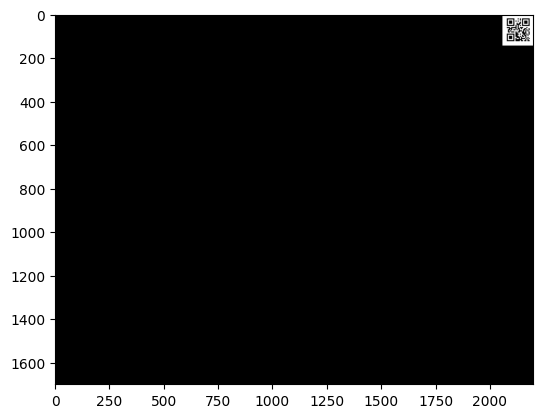

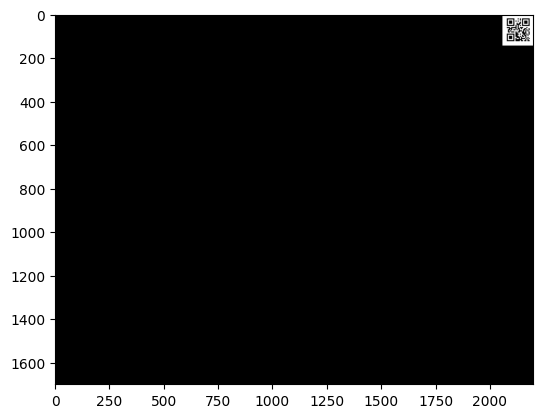

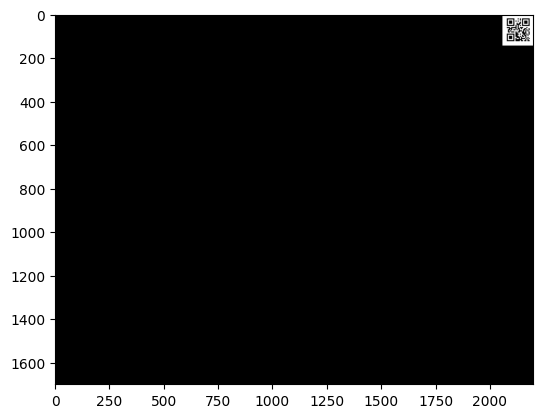

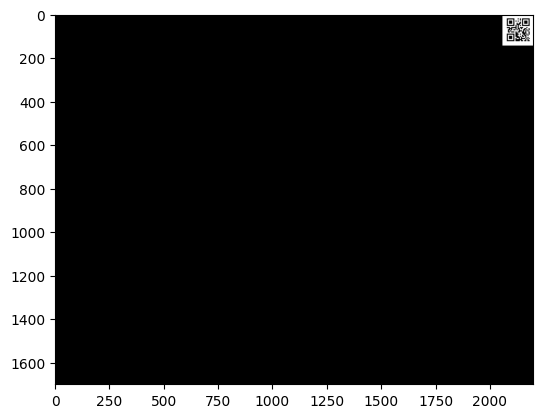

In [ ]:
for i in range(0, 256, 8):
    plt.imshow((gray > i) * 255, cmap = "grey")
    plt.show()